In [1]:
#Conecting to Google Drive



!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmpoxwilrrp/pubring.gpg' created
gpg: /tmp/tmpoxwilrrp/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [2]:
!pip install keras==2.1.5 #-q 

In [3]:
!python -c 'import keras; print(keras.__version__)'
!which python

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2.1.5
/usr/local/bin/python


In [4]:
#!pip install psycopg2
!pip install psycopg2-binary
!pip install h5py

In [0]:
#!pip install urllib.parse 
import urllib.parse 


In [0]:
def Process_tweet(tweet_string):

	tweet_string = tweet_string.replace('&#', '')
	tweet_string = tweet_string.replace('#', '')
	tweet_string = tweet_string.replace('&', '')	
	tweet_string = tweet_string.replace('MK', '')	
	tweet_string = tweet_string.replace('mkr', '')	
	tweet_string = tweet_string.replace('MKR', '')
	tweet_string = tweet_string.replace('&#', '')	
	tweet_string = tweet_string.replace('0', '')			
	tweet_string = tweet_string.replace('1', '')
	tweet_string = tweet_string.replace('2', '')	
	tweet_string = tweet_string.replace('3', '')
	tweet_string = tweet_string.replace('4', '')
	tweet_string = tweet_string.replace('5', '')
	tweet_string = tweet_string.replace('6', '')	
	tweet_string = tweet_string.replace('7', '')
	tweet_string = tweet_string.replace('8', '')	

	return tweet_string


In [7]:
import numpy as np

from keras.preprocessing.text import Tokenizer


import random

from keras import preprocessing
from keras.preprocessing.sequence import pad_sequences


from keras.models import Sequential 
from keras.layers import Flatten, Dense
from keras.layers import Embedding
import os



Using TensorFlow backend.


In [8]:
cd '/content/drive/Data Mining Project/Neural_Net'

/content/drive/Data Mining Project/Neural_Net


In [0]:
from  PostgreSQLConnector import PostgresConnector

def Data_Query(user_query):

    postgres = PostgresConnector()

    connObj = postgres.connect()
    cur = connObj.cursor()


    cur.execute( user_query )
    
    x = []

 
    for row in cur:
 
        
        x.append( row[1].strip("RT ") )
 
    

    cur.close()
    
    return x


#Library to use regular expressions to remove URLS in data set
import re
 


def Get_list_nonsexist_tweets():

    nonsexist_tweets = Data_Query("SELECT * FROM \"Tweets\" where label = 'none' ")

    for e in range(len(nonsexist_tweets)):
      tmp = re.sub(r"(?:\@|https?\://)\S+", "", nonsexist_tweets[e])
      nonsexist_tweets[e] = Process_tweet(tmp)

    return nonsexist_tweets

 
 
def Get_list_sexist_tweets():

    sexist_tweets = Data_Query("SELECT * FROM \"Tweets\" where label = 'sexist' ")

    for e in range(len(sexist_tweets)):
        tmp = re.sub(r"(?:\@|https?\://)\S+", "", sexist_tweets[e])
        sexist_tweets[e] =  Process_tweet(tmp)
    return sexist_tweets

In [10]:
nonsexist_tweets = Get_list_nonsexist_tweets()
sexist_tweets = Get_list_sexist_tweets()

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.1 on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 6.3.0-12ubuntu2) 6.3.0 20170406, 64-bit',)
Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.1 on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 6.3.0-12ubuntu2) 6.3.0 20170406, 64-bit',)


In [11]:
print( sexist_tweets[100:105])
print( nonsexist_tweets[100:105])



['""" You ain\'t ever gonna be a slice bitch."" Kevin hart. (:"', ' bitch', '""" Big booty hoes everywhere sheesh ;"" damn ;;;"', " at least he went up and wasn't a bitch", '"""   ol bitch ass"" ']
["I've seen soup kitchens that provide a higher quality of food. Seriously. R R", 'I love it when these judges compromise their values because the channel  script writers tell them to. No credibility. ', "All this endless instant restaurant rounds is making me develop the DDT's every time I touch a whisk. ", 'his show is officially fucked!!!!! Space Cadets get to stay FFS ', "So, I guess it's really happened. The  competition is running for eternity."]


In [12]:
nonsexist_tweets[0:5]

[' chef wankers ', 'pucker lips lol ', ' ', 'I am . ', 'Colin is back! ']

In [13]:
# Join the set of sexist and non sexist tweets in order to tokenize
all_tweets = []

for k in range(len(nonsexist_tweets)):
  all_tweets.append(nonsexist_tweets[k])

for k in range(len(sexist_tweets)):
  all_tweets.append(sexist_tweets[k])
  
print(len(all_tweets))

31239


In [0]:
#Creating labels vector

tweets_labels = [1]*(len(nonsexist_tweets)+len(sexist_tweets))
index_nonsexist = len(nonsexist_tweets)

for k in range(index_nonsexist):

  tweets_labels[k] = 0 #Since we know that these aren't sexist
  
tweets_labels = np.asarray(tweets_labels)


In [0]:
tweet_ordered_pair = list(zip(all_tweets, tweets_labels))

# Any tweet containing less than 10 characters may not be that useful
indices_to_remove = []
for j in range(len(tweet_ordered_pair)):
	tupla = tweet_ordered_pair[j]
	tweet_length = len(tupla[0])
	if tweet_length < 10:
		indices_to_remove.append(j)

for j in range(len(indices_to_remove)):
	tweet_ordered_pair.pop(indices_to_remove[j] - j )



In [16]:
all_tweets = []

for j in range(len(tweet_ordered_pair)):
	tupla = tweet_ordered_pair[j]
	all_tweets.append(tupla[0])

print(all_tweets[0:5])

[' chef wankers ', 'pucker lips lol ', 'Colin is back! ', 'hat really does look unappealing ', 'Well he ate it all ']


In [17]:
# Tokenization of tweets




# tweets_tokens = []

maxlen = 200


max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_tweets)
sequences = tokenizer.texts_to_sequences(all_tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

tweets_tokens = pad_sequences(sequences, maxlen=maxlen)





print('Shape of data tensor:', tweets_tokens.shape)
print('Shape of label tensor:', tweets_labels.shape)



Found 24514 unique tokens.
Shape of data tensor: (30408, 200)
Shape of label tensor: (31239,)


In [18]:
print(tweets_tokens[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  134   20  318  130   17    1 8309
   10 

In [19]:
ordered_labels = []
for j in range(len(tweet_ordered_pair)):
	tupla = tweet_ordered_pair[j]
	ordered_labels.append(tupla[1])
  
print(ordered_labels[0:3])

[0, 0, 0]


In [0]:
#Shuffle two list at once with same order


 
mixed = list(zip(tweets_tokens, ordered_labels))

#print(mixed[0])

random.shuffle(mixed)

tweets_tokens, tweets_labels = zip(*mixed)

In [0]:
# Looking if the shuffleing worked

#print(tweets_labels[25:27])
#print(tweets_tokens[25:27])

In [22]:
## Data Splitting and Filling
# We split 80% of the data for the training set and 20% for the test set

index_eighty = round(0.8*len(tweets_tokens))

index_fifty = round(0.5*len(tweets_tokens))

current_index = index_fifty


x_train = np.array( tweets_tokens[:current_index] )
x_test =  np.array( tweets_tokens[current_index:] )

y_train = np.array( tweets_labels[:current_index] )
y_test =  np.array( tweets_labels[current_index:] )

print(x_train[-1] == x_test[0])

#max_words = index_eighty




[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [0]:


max_features = len(x_train)

# Filling with zeroes so dimentions fits
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [24]:
#Parsing GloVe Files

glove_dir = '/content/drive/Data Mining Project/Neural_Net/glove_files'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:

model = Sequential()

model.add(Embedding( max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())

# Adding a classifier layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


#Addig GloVe Embeddings
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test) )
model.save_weights('pre_trained_glove_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________
Train on 15204 samples, validate on 15204 samples
Epoch 1/10
10272/15204 [===================>..........] - ETA: 2s - loss: 0.3981 - acc: 0.8199

15204/15204 [==============================] - 12s 774us/step - loss: 0.3823 - acc: 0.8311 - val_loss: 0.3262 - val_acc: 0.8616
Epoch 2/10
15204/15204 [==============================] - 11s 714us/step - loss: 0.2805 - acc: 0.8842 - val_loss: 0.4020 - val_acc: 0.8353
Epoch 3/10
15204/15204 [==============================] - 10s 686us/step - loss: 0.2174 - acc: 0.9124 - val_loss: 0.3232 - val_acc: 0.8758
Epoch 4/10
 3888/15204 [======>.......................] - ETA: 5s - loss: 0.1603 - acc: 0.9398

15204/15204 [==============================] - 10s 677us/step - loss: 0.1648 - acc: 0.9389 - val_loss: 0.3354 - val_acc: 0.8760
Epoch 5/10
15204/15204 [==============================] - 10s 674us/step - loss: 0.1203 - acc: 0.9556 - val_loss: 0.3792 - val_acc: 0.8751
Epoch 6/10
15204/15204 [==============================] - 10s 673us/step - loss: 0.0894 - acc: 0.9686 - val_loss: 0.4344 - val_acc: 0.8732
Epoch 7/10
 3584/15204 [======>.......................] - ETA: 5s - loss: 0.0629 - acc: 0.9791

15204/15204 [==============================] - 11s 714us/step - loss: 0.0651 - acc: 0.9792 - val_loss: 0.4736 - val_acc: 0.8764
Epoch 8/10
15204/15204 [==============================] - 10s 680us/step - loss: 0.0496 - acc: 0.9844 - val_loss: 0.5652 - val_acc: 0.8722
Epoch 9/10
15204/15204 [==============================] - 10s 681us/step - loss: 0.0369 - acc: 0.9888 - val_loss: 0.5642 - val_acc: 0.8762
Epoch 10/10
 3200/15204 [=====>........................] - ETA: 5s - loss: 0.0249 - acc: 0.9928

15204/15204 [==============================] - 10s 676us/step - loss: 0.0275 - acc: 0.9916 - val_loss: 0.6273 - val_acc: 0.8717


In [0]:
  new_instance = ["You're a fat bitch and nobody will like you. You shouldn't exist because you are a woman"]
  # create the tokenizer
  new_tok= Tokenizer()
  # fit the tokenizer on the documents
  new_tok.fit_on_texts(new_instance)
  
  temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


In [28]:

ynew = model.predict_classes(temp)
print(ynew)

[[1]]


In [29]:
new_instance = ["You're a very likeable, I hope we can be friends"]
# create the tokenizer
test_tok= Tokenizer()
# fit the tokenizer on the documents
test_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( test_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict_classes(temp)
print("Prediction")
print(ynew)

Prediction
[[1]]


In [30]:
new_instance = ["Shut up , make a sandwich while I keep playing since you're a  "] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict_classes(temp)
print("Prediction")
print(ynew)

Prediction
[[1]]


In [31]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep 

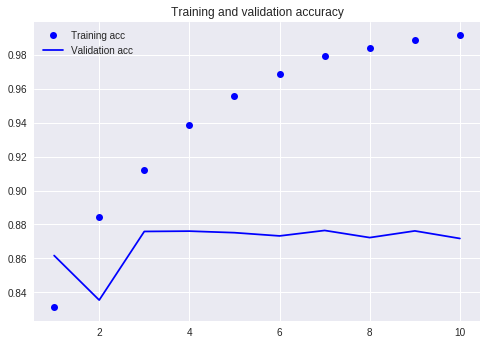

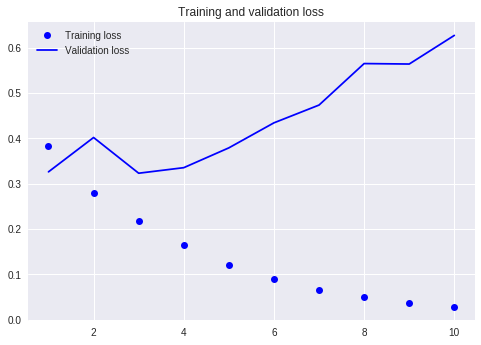

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

15204/15204 [==============================] - 2s 135us/step
Test loss: 0.6273432993191624
Test accuracy: 0.8716785056564063


In [0]:
model.save('sexism_classifier.h5')

In [35]:
new_instance = ["prepare some food bitch"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.03147013]]


In [36]:
tnew_instance = ["안녕"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.03147013]]


In [37]:
print(sexist_tweets[:5])

[' okay love you bitch', ' @ me hoe', ' little bitch', '  dumb hoe', ' my bad bitch ayeee ']


In [38]:
print(all_tweets[3:7])
print(tweets_labels[3:7])

['hat really does look unappealing ', 'Well he ate it all ', ' Oh this round should be a feast of terrible food. EXCELLENT ', " No, honey, you can't win this competition "]
(1, 0, 0, 0)


In [39]:
print(all_tweets[0])
print('\n')

print(all_tweets[1])

 chef wankers 


pucker lips lol 


In [40]:
!which python

/usr/local/bin/python
